In [1169]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor,XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [1170]:
data = pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1171]:
data.shape

(891, 12)

In [1172]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [1173]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1174]:
data_tic = data.drop(columns=["Ticket","Cabin","PassengerId","Name"])

In [1175]:
data_tic.Sex = pd.get_dummies(data.Sex,drop_first=True) 

## Handling NaN values

### Handling Embarked 

In [1176]:
mode_value = data_tic.Embarked.mode()
data_tic.Embarked.fillna(mode_value[0],inplace=True)

In [1177]:
data_tic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [1178]:
data_tic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [1179]:
embarked = pd.get_dummies(data_tic.Embarked,drop_first=True)

In [1180]:
data_tic = pd.concat([data_tic,embarked],axis=1)


In [1181]:
data_tic.drop(columns="Embarked",inplace=True)

In [1182]:
data_tic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


### Handling Age

In [1183]:
data_tic.Age.isnull().sum()

177

In [1184]:
index1 = data_tic[data_tic.Age.isnull()].index.values
test_data = data_tic.iloc[index1,:]
index1

array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888], dtype=int64)

In [1185]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
5,0,3,1,NaN,0,0,8.4583,1,0
17,1,2,1,NaN,0,0,13.0000,0,1
19,1,3,0,NaN,0,0,7.2250,0,0
26,0,3,1,NaN,0,0,7.2250,0,0
28,1,3,0,NaN,0,0,7.8792,1,0


In [1186]:
train_data = data_tic.dropna()


In [1187]:
corrilation = train_data.corr()
corrilation.iloc[:,3]

Survived   -0.077221
Pclass     -0.369226
Sex         0.093254
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Q          -0.022405
S          -0.023233
Name: Age, dtype: float64

In [1188]:
X = train_data.drop(columns=["Age","Survived","Q","S","Sex","Fare"])
y = train_data.loc[:,"Age"]
y = [int(i) for i in y]
X.head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


In [1189]:
X_testdata = test_data.drop(columns=["Age","Survived","Q","S","Sex","Fare"])
X_testdata.head()

,Pclass,SibSp,Parch
5,3,0,0
17,2,0,0
19,3,0,0
26,3,0,0
28,3,0,0


In [1190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 11 )

In [1191]:
X_train.shape

(642, 3)

In [1192]:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 49 )
    model_age = RandomForestRegressor(n_estimators=50,random_state=9)
    model_age.fit(X_train,y_train)
    y_predict = model_age.predict(X_testdata)

In [1193]:
y_predict

array([27.9777524 , 33.66146149, 27.9777524 , 27.9777524 , 27.9777524 ,
       27.9777524 , 37.50731018, 27.9777524 , 27.9777524 , 27.9777524 ,
       27.9777524 , 23.65129718, 27.9777524 , 26.80552165, 40.60012415,
       40.60012415, 21.31938397, 27.9777524 , 27.9777524 , 27.9777524 ,
       27.9777524 , 27.9777524 , 27.9777524 , 27.9777524 , 23.65129718,
       27.9777524 , 27.9777524 , 21.31938397, 21.69198612, 27.9777524 ,
       27.9777524 , 12.57721429, 36.18833846, 40.60012415,  4.018     ,
       12.57721429, 33.66146149, 40.60012415, 23.65129718, 27.9777524 ,
       27.9777524 , 12.57721429, 23.65129718, 27.9777524 ,  4.018     ,
       27.9777524 , 23.65129718, 23.65129718, 27.9777524 , 40.60012415,
       27.9777524 , 27.9777524 , 40.60012415, 27.9777524 , 33.66146149,
       40.60012415, 40.60012415, 40.60012415, 27.9777524 , 26.80552165,
       33.66146149, 27.9777524 , 40.60012415, 12.57721429, 26.80552165,
       37.50731018, 27.9777524 , 23.65129718, 40.60012415, 27.97

In [1194]:
test_data = test_data.drop(columns=["Age"])

In [1195]:
#test_data["Age"] = y_predict.round()

In [1196]:
data_tic = pd.concat([train_data,test_data],axis=0)

In [1197]:
data_tic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [1198]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Handling Cabin

In [1199]:
data_tic["Cabin"] = data["Cabin"]

In [1200]:
data_tic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Q             0
S             0
Cabin       687
dtype: int64

In [1201]:
index1 = data_tic["Cabin"].dropna().index.values
train_data1 = data_tic.loc[index1,:] 
Counter(train_data1.Survived.values)

Counter({1: 136, 0: 68})

In [1202]:
Cabin = [str(i)[0] for i in train_data1.Cabin]
train_data1["Cabin"]  = Cabin

In [1203]:
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Cabin
1,1,1,0,38.0,1,0,71.2833,0,0,C
3,1,1,0,35.0,1,0,53.1000,0,1,C
6,0,1,1,54.0,0,0,51.8625,0,1,E
10,1,3,0,4.0,1,1,16.7000,0,1,G
11,1,1,0,58.0,0,0,26.5500,0,1,C


In [1204]:
dict1 ={
        "C" : 59,
        "B" : 47,
        "D" : 33,
        "E" : 32,
        "A" : 15,
        "F" : 13,
        "G" : 4,
        "T" : 1
}

In [1205]:
train_data1.Cabin = train_data1.Cabin.map(dict1)

In [1206]:
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Cabin
1,1,1,0,38.0,1,0,71.2833,0,0,59
3,1,1,0,35.0,1,0,53.1000,0,1,59
6,0,1,1,54.0,0,0,51.8625,0,1,32
10,1,3,0,4.0,1,1,16.7000,0,1,4
11,1,1,0,58.0,0,0,26.5500,0,1,59


In [1207]:
train_data1.drop(columns="Survived",inplace=True)

In [1208]:
data_tic.Cabin.isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
859     True
863     True
868     True
878     True
888     True
Name: Cabin, Length: 891, dtype: bool

In [1209]:
loc = data_tic[data_tic.Cabin.isnull() == True].index
test_data1= data_tic.loc[loc]
test_data1.shape

(687, 10)

In [1210]:
test_data1.Survived.value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [1211]:
X.head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


In [1212]:
X = train_data1.iloc[:,:-1]
y = train_data1.Cabin

In [1213]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
1,1,0,38.0,1,0,71.2833,0,0
3,1,0,35.0,1,0,53.1000,0,1
6,1,1,54.0,0,0,51.8625,0,1
10,3,0,4.0,1,1,16.7000,0,1
11,1,0,58.0,0,0,26.5500,0,1


In [1214]:

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 24,test_size =.1)
    model_cabin = XGBClassifier(random_state = 24)
    model_cabin.fit(X_train,y_train)
    y_predict = model_cabin.predict(X_test)
    accuracy_score(y_test,y_predict)
    

0.7619047619047619

In [1215]:
test_data1.drop(columns=["Cabin"],inplace=True)
   

In [1216]:
test_data1.drop(columns=["Survived"],inplace=True)

In [1217]:
test_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
2,3,0,26.0,0,0,7.9250,0,1
4,3,1,35.0,0,0,8.0500,0,1
7,3,1,2.0,3,1,21.0750,0,1
8,3,0,27.0,0,2,11.1333,0,1


In [1218]:
y_predict = model_cabin.predict(test_data1)
y_predict

array([13, 32, 13, 13, 32, 13, 13, 13, 13, 32, 13,  4, 13,  4,  4, 13, 47,
       32, 59, 59, 13,  4,  4,  4, 32, 13, 13,  4, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13,  4, 32, 32,  4, 33, 32, 32, 13, 32, 32, 13, 15, 13,
       32, 13, 13, 13, 13, 32, 13, 13, 13, 13, 32, 13, 13, 13, 13,  4, 32,
        4,  4, 13, 13, 13, 13, 33, 33, 32, 13, 13, 13, 13, 33, 13, 13, 33,
       32, 13,  4, 13, 32, 13, 13, 13, 33, 32, 32, 33, 47, 13, 32, 32, 33,
       13, 13, 13, 13, 13, 32, 13,  4, 13, 13, 32, 13, 13, 13, 47, 33, 13,
       32, 13, 13, 13, 13, 13, 13, 13, 13, 32, 32, 13, 13, 33, 13, 32, 32,
       13, 13, 13, 32, 32, 32, 13, 13, 13, 13, 32, 13, 13, 13, 13, 13, 32,
       13, 13, 13, 13, 13, 32, 32, 13, 32, 47, 32, 13, 13, 13, 13, 13, 33,
       13, 13, 33, 13, 13, 32, 13, 32, 32, 13, 33, 13, 32,  4, 13, 13, 13,
       13, 32, 13, 13, 13, 13, 32, 13, 13, 32, 13, 13,  4,  4, 13, 32, 13,
       33, 33,  4, 13, 32, 13, 32, 13, 33, 13, 59, 33, 13, 13, 13, 13, 59,
        4, 13, 13, 13, 59

In [1219]:
test_data1["Cabin"] = y_predict

In [1220]:
data_tic1 = pd.concat([train_data1,test_data1],axis =0)

In [1221]:
data_tic = pd.concat([data_tic1,data_tic.Survived],axis = 1)

In [1222]:
data_tic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Q             0
S             0
Cabin         0
Survived      0
dtype: int64

# feature extraction


In [1223]:
data["label"] = data.Name.str.extract( '([a-zA-Z]+)\.',expand=False)

In [1224]:
data.label.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Sir           1
Capt          1
Don           1
Jonkheer      1
Ms            1
Countess      1
Mme           1
Name: label, dtype: int64

In [1329]:
dict2 = {
            "Mr" : 517,
            "Miss" : 182,
            "Mrs"  :125,
            "Master":40,
            "Dr"    :7,
            "Rev"   :6,
            "Mlle"  :2,
            "Major" :2,  
            "Col" : 2,
            "Countess" :1,
            "Don"  :1,
            "Capt" :1,
            "Sir" :1,
            "Jonkheer" :1,
            "Mme": 1,
            "Lady": 1,
            "Ms":1
        }

In [1226]:
data_tic["label"]  = data.label

In [1227]:
data_tic["label"] = data_tic.label.map(dict2)

In [1228]:
data_tic

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Cabin,Survived,label
0,3,1,22.0,1,0,7.2500,0,1,13,0,517
1,1,0,38.0,1,0,71.2833,0,0,59,1,125
2,3,0,26.0,0,0,7.9250,0,1,32,1,182
3,1,0,35.0,1,0,53.1000,0,1,59,1,125
4,3,1,35.0,0,0,8.0500,0,1,13,0,517
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1,32,0,6
887,1,0,19.0,0,0,30.0000,0,1,47,1,182
888,3,0,NaN,1,2,23.4500,0,1,13,0,182
889,1,1,26.0,0,0,30.0000,0,0,59,1,517


In [1229]:
corrilation_data = data_tic.corr()
plt.rcParams["figure.figsize"] = 15,8

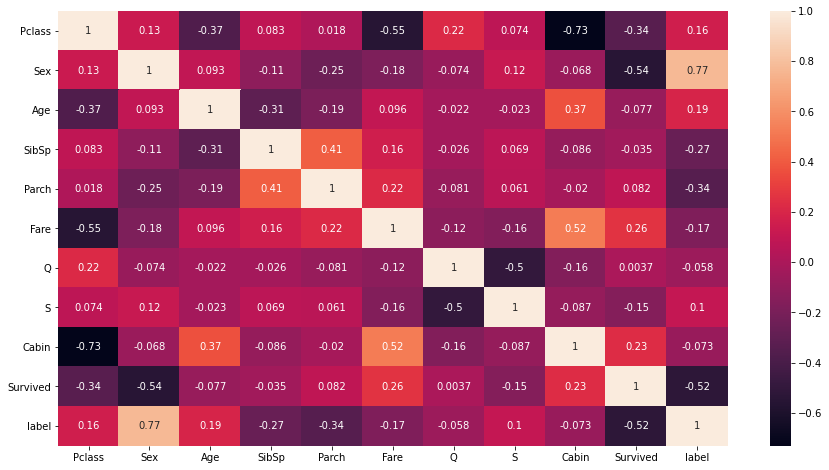

In [1230]:
sb.heatmap(corrilation_data,annot=True)
plt.show()

In [1231]:
drop_cor =set()
for i in range(len(corrilation_data)):
    for j in range(i):
        if abs(corrilation_data.iloc[i,j]) > 0.8:
            column = corrilation_data.columns[i]
            drop_cor.add(column)

In [1232]:
drop_col =set()
for i in enumerate(corrilation_data["Survived"]):
    if abs(i[1]) < 0.15:
        column = corrilation_data.columns[i[0]]
        drop_col.add(column)
        

In [1233]:
drop_col

{'Age', 'Parch', 'Q', 'S', 'SibSp'}

In [1234]:
data_tic.drop(columns=drop_col,inplace=True)

In [1235]:
X = data_tic.drop(columns=["Survived"])
y = data_tic.Survived
column_name = X.columns 
Counter(y)

Counter({0: 549, 1: 342})

In [1236]:
#scailing
scale = StandardScaler()
X = scale.fit_transform(X)

In [1325]:
X = pd.DataFrame(X,columns=column_name)

In [1326]:
X.head()

,Pclass,Sex,Fare,Cabin,label
0,0.827377,0.737695,-0.502445,-0.682119,0.834363
1,-1.566107,-1.355574,0.786845,2.187066,-1.204906
2,0.827377,-1.355574,-0.488854,0.502979,-0.908379
3,-1.566107,-1.355574,0.420730,2.187066,-1.204906
4,0.827377,0.737695,-0.486337,-0.682119,0.834363


In [1324]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 5)


In [1239]:
'''
for i in range(100):
    X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 34)
    model = RandomForestClassifier(random_state = 24)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    acc = accuracy_score(y_test,y_predict)
    if acc > 0.894:
        print(i,"-----",acc)
'''

'\nfor i in range(100):\n    X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 34)\n    model = RandomForestClassifier(random_state = 24)\n    model.fit(X_train,y_train)\n    y_predict = model.predict(X_test)\n    acc = accuracy_score(y_test,y_predict)\n    if acc > 0.894:\n        print(i,"-----",acc)\n'

In [1240]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [1241]:
params = {
            "n_estimators" : [30,50,70,120,150],
            "min_samples_split" : [2],
            "max_depth" : [10,15,20,40]
          }


In [1242]:
cv_score = RandomizedSearchCV(RandomForestClassifier(),params,scoring="accuracy")
cv_score.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 15, 20, 40],
                                        'min_samples_split': [2],
                                        'n_estimators': [30, 50, 70, 120, 150]},
                   scoring='accuracy')

In [1243]:
cv_score.best_score_

0.8286023835319609

In [1244]:
cv_score.best_params_

{'n_estimators': 120, 'min_samples_split': 2, 'max_depth': 10}

In [1245]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 34)
model = RandomForestClassifier(n_estimators=100,random_state = 24,max_depth=20,min_samples_split=2)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8994413407821229

In [1246]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,109,9
1,9,52


In [1247]:
import pickle as pkl

In [1248]:
pkl.dump(model,open("model.pkl","wb"))

In [1249]:
data_tic.head()

,Pclass,Sex,Fare,Cabin,Survived,label
0,3,1,7.2500,13,0,517
1,1,0,71.2833,59,1,125
2,3,0,7.9250,32,1,182
3,1,0,53.1000,59,1,125
4,3,1,8.0500,13,0,517


# Test Data

In [1346]:
Tdata = pd.read_csv("titanic_test")

In [1347]:
Tdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1348]:
Tdata.shape

(418, 11)

In [1349]:
Tdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1350]:
Tdata = Tdata.drop(columns=["Ticket","PassengerId"])

In [1351]:
Tdata.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [1352]:
Tdata.Fare.fillna(Tdata.Fare.mean(),inplace=True)

In [1353]:
Tdata.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [1354]:
Tdata["Sex"] = pd.get_dummies(Tdata.Sex,drop_first=True)

In [1355]:
Tdata.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,S


In [1356]:
Age_test = Tdata.loc[:,["Pclass","SibSp","Parch","Age"]]
loc = Age_test[Age_test.Age.isnull() == True].index
Age_test= Age_test.loc[loc]
Age_test

,Pclass,SibSp,Parch,Age
10,3,0,0,NaN
22,1,0,0,NaN
29,3,2,0,NaN
33,3,1,2,NaN
36,3,0,0,NaN
...,...,...,...,...
408,3,0,0,NaN
410,3,0,0,NaN
413,3,0,0,NaN
416,3,0,0,NaN


In [1357]:
Age_test.drop(columns="Age",inplace=True)

In [1358]:
Age_predict = model_age.predict(Age_test)
Age_predict = Age_predict.round()
Age_predict

array([28., 41., 27., 14., 28., 28., 41., 28., 34., 24., 34., 28., 28.,
       34., 24., 28., 28., 28., 28., 28., 28., 28., 28., 24., 28., 27.,
       32., 24., 41., 41., 28., 28., 28., 41., 28., 28., 28., 13., 41.,
       28., 28., 41., 28., 28., 28., 22., 28., 28., 28., 14., 24., 28.,
       28., 28., 41., 28., 28., 28., 24., 28., 28., 28., 28., 28., 41.,
       28., 27., 34., 28., 28., 28., 28., 41., 21., 28., 28., 41., 24.,
       28., 28., 34., 28., 28., 28., 28., 21.])

In [1359]:
Tdata.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [1360]:
Tdata.Age.fillna("x",inplace=True)

In [1361]:
j = 0
Age =[]
for m,i in enumerate(Tdata.Age):
    if i == "x":
        Age.append(Age_predict[j])
        j=j+1
    else:
        Age.append(Tdata.Age[m])
len(Age)

418

In [1362]:
Tdata["Age"] = Age

In [1363]:
Tdata.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,S


In [1364]:
Tdata["Cabin"] = [str(i)[0] for i in Tdata.Cabin]

In [1365]:
Tdata.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [1366]:
Cabin_testdata = Tdata.drop(columns=["Name"])

In [1367]:
Cabin_testdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,n,Q
1,3,0,47.0,1,0,7.0000,n,S
2,2,1,62.0,0,0,9.6875,n,Q
3,3,1,27.0,0,0,8.6625,n,S
4,3,0,22.0,1,1,12.2875,n,S
...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,n,S
414,1,0,39.0,0,0,108.9000,C,C
415,3,1,38.5,0,0,7.2500,n,S
416,3,1,28.0,0,0,8.0500,n,S


In [1368]:
Embarked = pd.get_dummies(Cabin_testdata.Embarked,drop_first=True)

In [1369]:
Cabin_testdata.drop(columns=["Embarked"],inplace = True)

In [1370]:
Cabin_testdata = pd.concat([Cabin_testdata,Embarked],axis=1)

In [1371]:
Cabin_testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,3,1,34.5,0,0,7.8292,n,1,0
1,3,0,47.0,1,0,7.0000,n,0,1
2,2,1,62.0,0,0,9.6875,n,1,0
3,3,1,27.0,0,0,8.6625,n,0,1
4,3,0,22.0,1,1,12.2875,n,0,1


In [1372]:
Cloc = Cabin_testdata[Cabin_testdata.Cabin == "n"].index
Cabin_testdata= Cabin_testdata.loc[Cloc]

In [1373]:
Cabin_testdata.Cabin.value_counts()

n    327
Name: Cabin, dtype: int64

In [1374]:
Cabin_testdata.drop(columns=["Cabin",],inplace=True)

In [1375]:
Cabin_testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [1376]:
cabin_predict = model_cabin.predict(Cabin_testdata)

In [1377]:
dict1 ={
        "C" : 59,
        "B" : 47,
        "D" : 33,
        "E" : 32,
        "A" : 15,
        "F" : 13,
        "G" : 4,
        "T" : 1,
        "n" : "n"
}

In [1378]:
Tdata.Cabin = Tdata.Cabin.map(dict1)

In [1379]:
Tdata.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,n,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,n,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,n,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,n,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,n,S


In [1380]:
j = 0
Cabin =[]
for m,i in enumerate(Tdata.Cabin):
    if i == "n":
        Cabin.append(cabin_predict[j])
        j=j+1
    else:
        Cabin.append(Tdata.Cabin[m])
Cabin

[13,
 13,
 13,
 32,
 4,
 32,
 13,
 59,
 13,
 13,
 13,
 32,
 47,
 32,
 32,
 13,
 32,
 13,
 32,
 13,
 47,
 13,
 33,
 47,
 47,
 32,
 47,
 13,
 15,
 32,
 32,
 13,
 32,
 13,
 59,
 13,
 4,
 4,
 13,
 32,
 33,
 33,
 13,
 32,
 33,
 13,
 15,
 13,
 33,
 33,
 59,
 32,
 13,
 59,
 33,
 13,
 13,
 13,
 13,
 47,
 13,
 32,
 13,
 13,
 47,
 13,
 13,
 32,
 59,
 59,
 13,
 13,
 4,
 33,
 59,
 59,
 13,
 59,
 32,
 13,
 4,
 59,
 32,
 13,
 13,
 4,
 13,
 4,
 13,
 13,
 4,
 13,
 47,
 13,
 32,
 13,
 59,
 13,
 13,
 32,
 59,
 32,
 13,
 13,
 4,
 13,
 13,
 13,
 13,
 13,
 33,
 13,
 15,
 13,
 59,
 33,
 13,
 4,
 59,
 13,
 13,
 13,
 59,
 13,
 13,
 4,
 13,
 32,
 33,
 13,
 32,
 59,
 32,
 13,
 13,
 13,
 13,
 32,
 4,
 13,
 13,
 59,
 47,
 13,
 47,
 32,
 32,
 32,
 47,
 13,
 59,
 13,
 13,
 32,
 13,
 13,
 59,
 13,
 33,
 32,
 13,
 4,
 32,
 13,
 33,
 32,
 47,
 13,
 47,
 4,
 13,
 13,
 33,
 13,
 13,
 13,
 13,
 59,
 13,
 32,
 32,
 32,
 33,
 13,
 47,
 33,
 13,
 13,
 13,
 33,
 13,
 32,
 4,
 32,
 13,
 13,
 32,
 13,
 13,
 4,
 32,
 4,
 59,
 1

In [1381]:
Tdata["Cabin"] = Cabin

In [1382]:
Tdata.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,13,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,13,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,13,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,32,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,4,S


In [1383]:
Tdata["label"] = Tdata.Name.str.extract( '([a-zA-Z]+)\.',expand=False)

In [1384]:
dict2 = {
            "Mr"       : 517,
            "Miss"     : 182,
            "Mrs"      : 125,
            "Master"   : 40,
            "Dr"       : 7,
            "Rev"      : 6,
            "Mlle"     : 2,
            "Major"    : 2,  
            "Col"      : 2,
            "Countess" : 1,
            "Don"      : 1,
            "Capt"     : 1,
            "Sir"      : 1,
            "Jonkheer" : 1,
            "Mme"      : 1,
            "Lady"     : 1,
            "Ms"       : 1,
            "Dona"     : 1
        }

In [1385]:
Tdata["label"] = Tdata.label.map(dict2)

In [1386]:
Tdata.drop(columns=["Name","Embarked"],inplace =True)

In [1387]:
# Pclass	Sex	Fare	Cabin	label

In [1388]:
Tdata.drop(columns=["Age","SibSp","Parch"],inplace=True)

In [1389]:
Tdata.head()

,Pclass,Sex,Fare,Cabin,label
0,3,1,7.8292,13,517
1,3,0,7.0000,13,125
2,2,1,9.6875,13,517
3,3,1,8.6625,32,517
4,3,0,12.2875,4,125


In [1390]:
column_name = Tdata.columns 
Tdata = scale.transform(Tdata)
Tdata = pd.DataFrame(Tdata,columns=column_name)

In [1391]:
Tdata.head()

,Pclass,Sex,Fare,Cabin,label
0,0.827377,0.737695,-0.490783,-0.682119,0.834363
1,0.827377,-1.355574,-0.507479,-0.682119,-1.204906
2,-0.369365,0.737695,-0.453367,-0.682119,0.834363
3,0.827377,0.737695,-0.474005,0.502979,0.834363
4,0.827377,-1.355574,-0.401017,-1.243482,-1.204906


In [1392]:
main_prediction = model.predict(Tdata)

In [1396]:
main_prediction = pd.DataFrame(main_prediction,columns=["Survived"])

In [1399]:
main_prediction


,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [1412]:
Tdata1 = pd.read_csv("titanic_test")

In [1413]:
Tdata1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1416]:
main_prediction1 = pd.DataFrame()
main_prediction1["PassengerId"] = Tdata1.PassengerId
main_prediction1["Survived"] = main_prediction.Survived

In [1417]:
main_prediction1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [1418]:
main_prediction1.to_csv("predicted_out.csv",index=False)

In [1419]:
predicted_out = pd.read_csv("predicted_out.csv")

In [1420]:
predicted_out.shape

(418, 2)

In [1421]:
predicted_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
